In [2]:
# using Revise
using CMBLensing
using CMBLensing: jrk4
using PyPlot

In [3]:
rc("xtick",top=true,bottom=true,direction="in",labelsize=12)
rc("ytick",left=true,right=true,direction="in",labelsize=12)
rc("axes",labelsize=16,titlesize=16)
rc("legend",frameon=false,fontsize=12)
rc("figure",figsize=(6.4,4.8))

In [17]:
cls = camb()[:f];

In [46]:
T=Float64
nside=512
P=Flat{1//8,nside}

CMBLensing.Flat{1//8,512}

In [47]:
Cf = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:TT])
# Cf = Cℓ_to_cov(T,P,S2,cls[:ℓ],cls[:ee],cls[:bb])
Cϕ = Cℓ_to_cov(T,P,S0,cls[:ℓ],cls[:ϕϕ])

CMBLensing.FullDiagOp{CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}},CMBLensing.Flat{1//8,512},CMBLensing.S0,CMBLensing.Fourier}(CMBLensing.FlatS0Fourier{Float64,CMBLensing.Flat{1//8,512}}(Complex{Float64}[0.0+0.0im 1.33703e-17+0.0im … 2.97749e-19+0.0im 1.33703e-17+0.0im; 1.33703e-17+0.0im 2.0716e-18+0.0im … 1.58065e-19+0.0im 2.0716e-18+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]))

In [48]:
srand(3)
f = simulate(Cf)
ϕ = simulate(Cϕ)
f2 = ud_grade(f,2)
ϕ2 = ud_grade(ϕ,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([3.40408e-7 3.44473e-7 … 2.96907e-7 3.23915e-7; 2.28838e-7 2.48657e-7 … 1.74251e-7 2.02602e-7; … ; 5.76722e-7 5.55075e-7 … 5.7272e-7 5.81457e-7; 4.58717e-7 4.48549e-7 … 4.32085e-7 4.51289e-7])

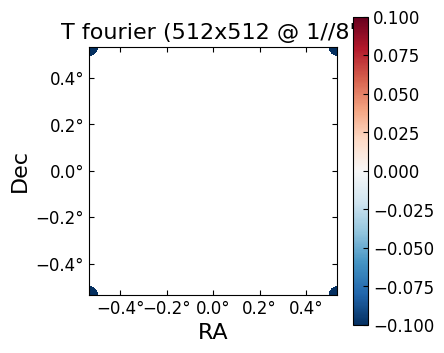

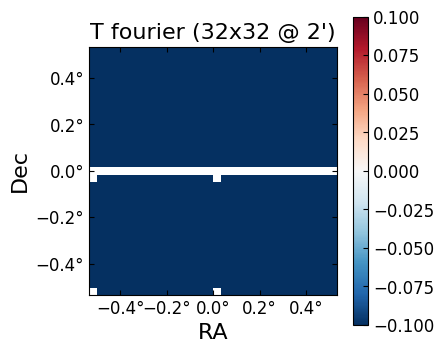

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7fc278f11390>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc2801dc7b8>])

In [49]:
plot(f,which=[:Tl])
plot(f2,which=[:Tl])

In [50]:
LF=LenseFlow{jrk4{14}}
PL=PowerLens{10}

CMBLensing.PowerLens{10,F} where F<:(CMBLensing.Field{#s60,#s59,B} where B<:CMBLensing.Basis where #s59<:CMBLensing.S0 where #s60)

In [51]:
truth = ud_grade(LF(ϕ)*f,2)

CMBLensing.FlatS0Map{Float64,CMBLensing.Flat{2,32}}([-97.0099 -96.5318 … -62.3039 -84.2599; -63.0176 -62.691 … -32.7814 -53.5796; … ; -88.2748 -94.9175 … -37.6057 -63.8462; -102.458 -105.323 … -57.7268 -83.571])

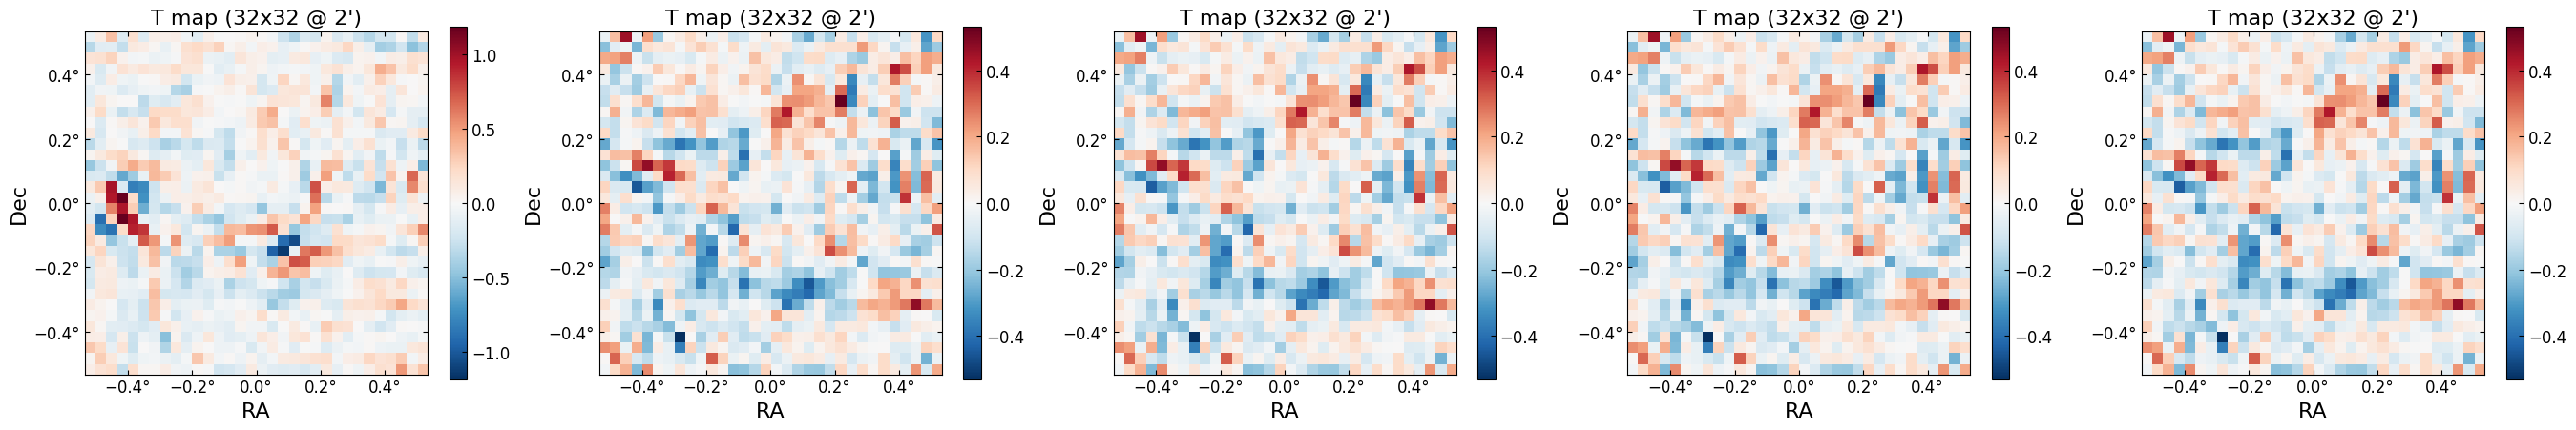

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7fc278f00b38>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc28029e3c8> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc278b6bd68> … PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc2abf406d8> PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc2abf0db00>])

In [52]:
plot([PowerLens{i}(ϕ2)*f2-truth for i=[2,5,7,10,20]]')

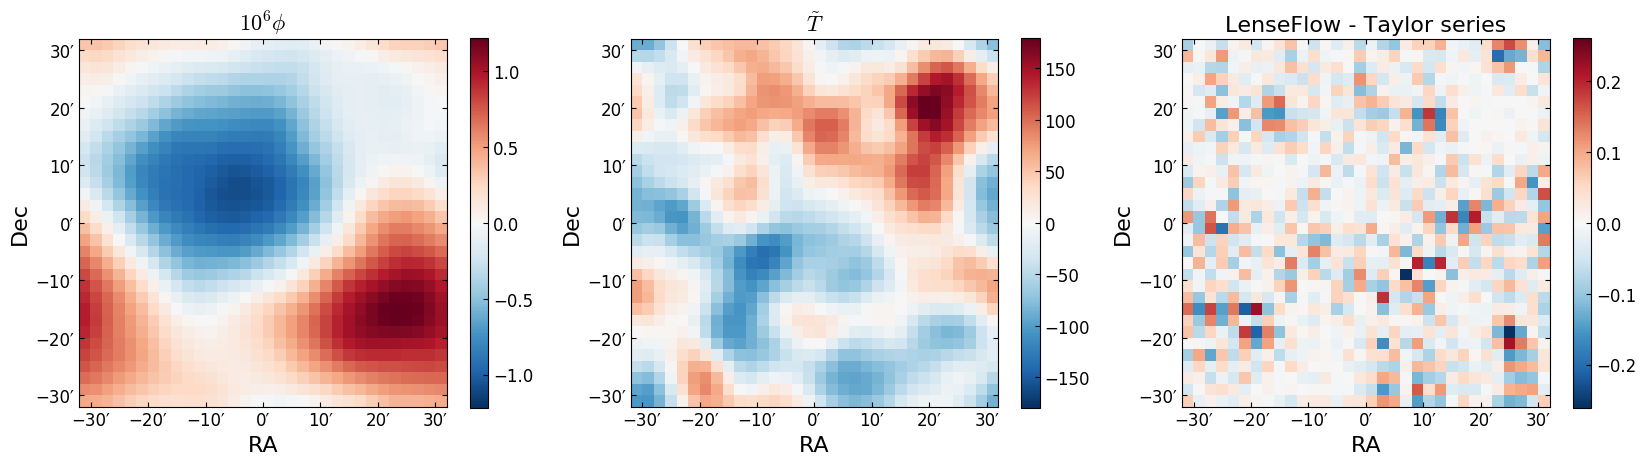

PyObject <matplotlib.text.Text object at 0x7fc278f728d0>

In [53]:
_,axs = plot([1e6ϕ2,f2,LF(ϕ2)*f2-PL(ϕ2)*f2]',units=:arcmin)
axs[1,1][:set_title](raw"$10^6\phi$")
axs[1,2][:set_title](raw"$\tilde T$")
axs[1,3][:set_title](raw"LenseFlow - Taylor series")


In [54]:
dat = [1e6ϕ f LF(ϕ)*f-f;
LF(ϕ2)*f2-truth  PL(ϕ2)*f2-truth LF(ϕ2)*f2-PL(ϕ2)*f2];

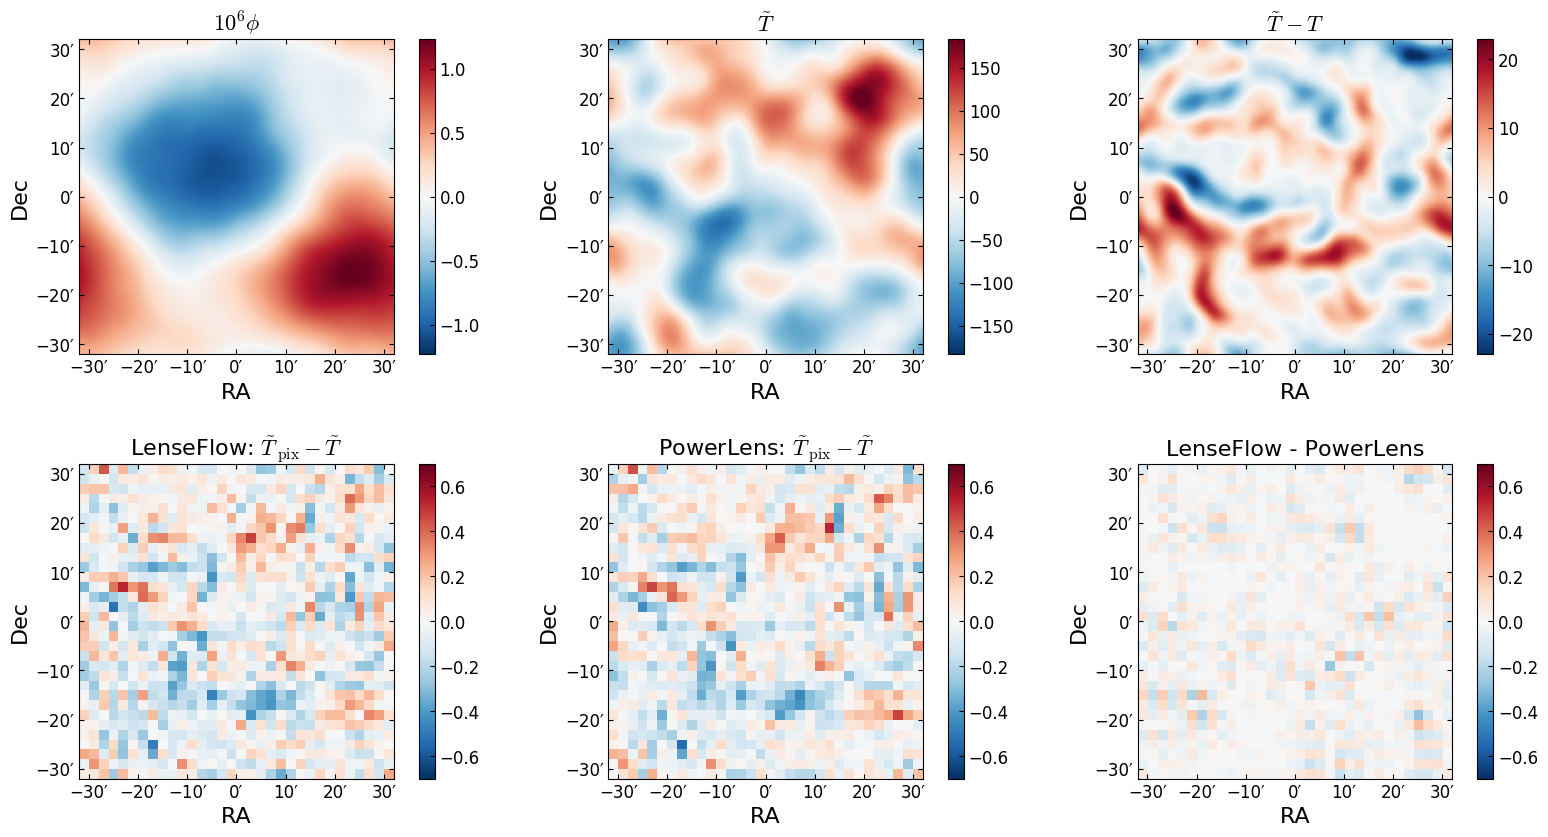

In [55]:
_,axs = plot(dat, units=:arcmin)
subplots_adjust(wspace=0.05, hspace=0.35)

axs[1,1][:set_title](raw"$10^6\phi$")
axs[1,2][:set_title](raw"$\tilde T$")
axs[1,3][:set_title](raw"$\tilde T - T$")
axs[2,1][:set_title](raw"LenseFlow: $\tilde T_{\rm pix} - \tilde T$")
axs[2,2][:set_title](raw"PowerLens: $\tilde T_{\rm pix} - \tilde T$")
axs[2,3][:set_title](raw"LenseFlow - PowerLens")

for i=1:3; axs[2,i][:get_children]()[end-1][:set_clim](-0.7,0.7); end


# savefig("../paper/figs/lenseflow_pixlens.pdf",bbox_inches="tight")